In [ ]:
from google.colab import drive

# Mounting Google Drive
drive.mount("/content/gdrive/")

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [ ]:
# Listing the files inside the Google Drive directory (Use your own directory)
!ls "/content/gdrive/MyDrive/Fall2023/CS464 - ML/Project/dataset"

test  train


## Importing the libraries

In [ ]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

## Data Preprocessing

In [ ]:
dataset_path = "/content/gdrive/MyDrive/Fall2023/CS464 - ML/Project/dataset"

In [ ]:
train_datagen = ImageDataGenerator(
    validation_split=0.2,
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

train_set = train_datagen.flow_from_directory(
    dataset_path + "/train",
    target_size=(48,48),
    color_mode="grayscale",
    batch_size=32,
    class_mode="categorical",
    classes=None, subset="training")

val_set = train_datagen.flow_from_directory(
    dataset_path + "/train",
    target_size=(48,48),
    color_mode="grayscale",
    batch_size=32,
    class_mode="categorical",
    classes=None, subset="validation")

Found 22973 images belonging to 7 classes.
Found 5742 images belonging to 7 classes.


In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(
    dataset_path + "/test",
    target_size=(48,48),
    color_mode="grayscale",
    batch_size=32,
    class_mode='categorical')

Found 7184 images belonging to 7 classes.


## Building the CNN

Initialising the CNN

In [ ]:
cnn = tf.keras.models.Sequential()

Layer 1

Step 1 - Convolution

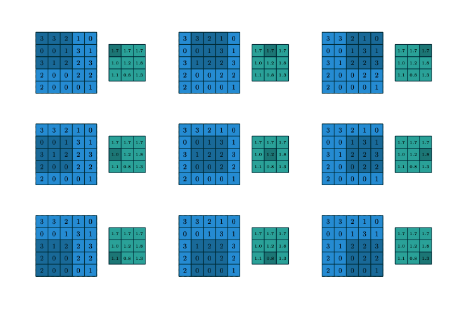

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', input_shape=[48,48,1]))

Step 2 - Pooling

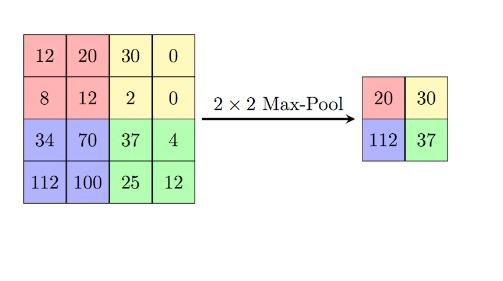

 It adds a small amount of translation invariance - meaning translating the image by a small amount does not significantly affect the values of most pooled outputs.

In [ ]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.Dropout(0.2))

Layer 2

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.Dropout(0.2))

Layer 3

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.Dropout(0.2))

Layer 4

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.Dropout(0.2))

Flattening

In [ ]:
cnn.add(tf.keras.layers.Flatten())

Fully connected layer

In [ ]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.Dropout(0.2))

cnn.add(tf.keras.layers.Dense(units=64, activation='relu'))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.Dropout(0.2))

cnn.add(tf.keras.layers.Dense(units=32, activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.2))

Output layer

In [ ]:
cnn.add(tf.keras.layers.Dense(7, activation='softmax'))

In [ ]:
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 23, 23, 64)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 23, 23, 64)        256       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 23, 23, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 10, 10, 128)       0

In [ ]:
cnn.fit(x = train_set, validation_data = val_set, epochs = 20)

Epoch 1/20
718/718 [==============================] - 102s 117ms/step - loss: 1.8528 - accuracy: 0.2508 - val_loss: 1.6860 - val_accuracy: 0.3347
Epoch 2/20
718/718 [==============================] - 73s 102ms/step - loss: 1.6344 - accuracy: 0.3506 - val_loss: 1.5974 - val_accuracy: 0.3664
Epoch 3/20
718/718 [==============================] - 70s 97ms/step - loss: 1.5015 - accuracy: 0.4190 - val_loss: 1.4368 - val_accuracy: 0.4439
Epoch 4/20
718/718 [==============================] - 69s 96ms/step - loss: 1.4207 - accuracy: 0.4571 - val_loss: 1.4121 - val_accuracy: 0.4666
Epoch 5/20
718/718 [==============================] - 71s 98ms/step - loss: 1.3698 - accuracy: 0.4788 - val_loss: 1.4473 - val_accuracy: 0.4411
Epoch 6/20
718/718 [==============================] - 69s 96ms/step - loss: 1.3279 - accuracy: 0.5044 - val_loss: 1.3310 - val_accuracy: 0.4869
Epoch 7/20
718/718 [==============================] - 77s 107ms/step - loss: 1.2967 - accuracy: 0.5136 - val_loss: 1.2878 - val_accur

In [ ]:
CNN_Score = cnn.evaluate(test_set)

print("    Test Loss: {:.5f}".format(CNN_Score[0]))
print("Test Accuracy: {:.2f}%".format(CNN_Score[1] * 100))

225/225 [==============================] - 1426s 6s/step - loss: 1.0867 - accuracy: 0.5837
    Test Loss: 1.08669
Test Accuracy: 58.37%


In [ ]:
CNN_Predictions = cnn.predict(test_set)

# Choosing highest probalbilty class in every prediction
CNN_Predictions = np.argmax(CNN_Predictions, axis=1)

225/225 [==============================] - 14s 59ms/step


In [ ]:
#get the relationship between classes name and numbers
test_set.class_indices

{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

Text(0.5, 1.0, 'CNN Confusion Matrix')

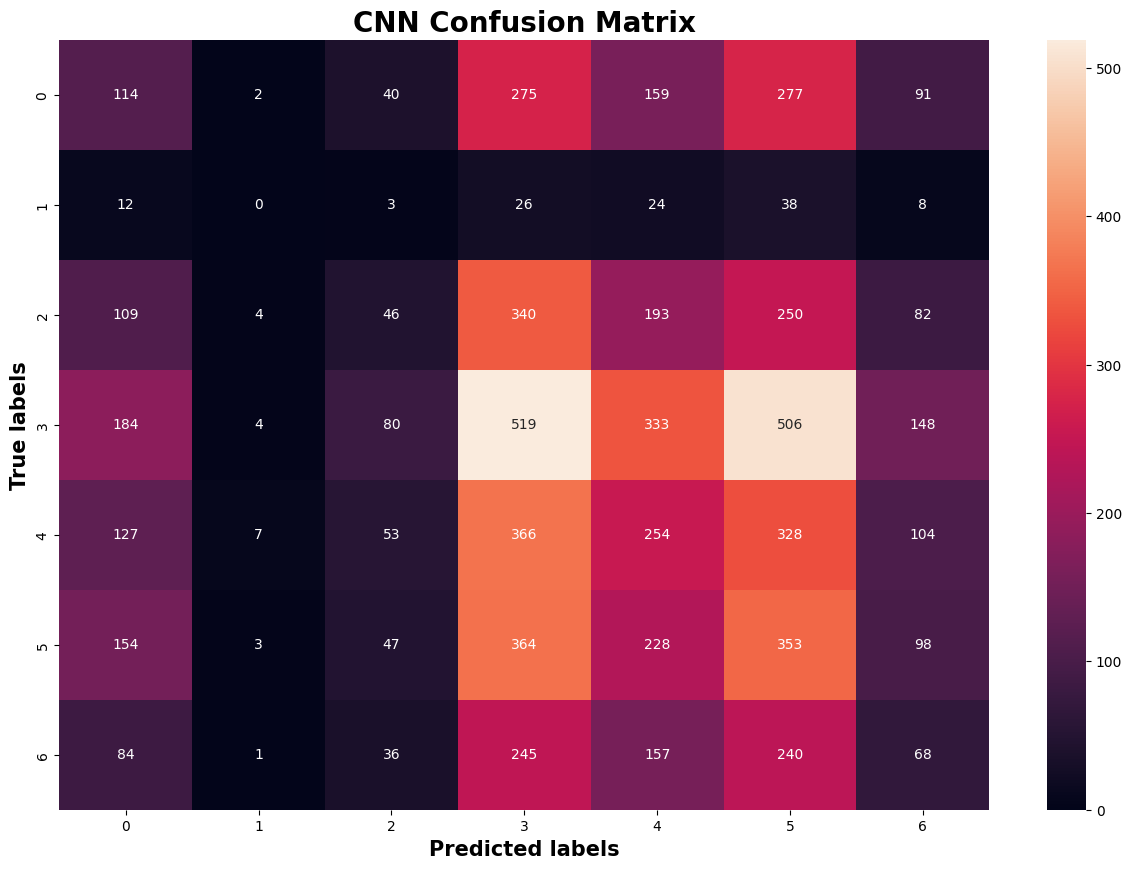

In [ ]:
fig, ax= plt.subplots(figsize=(15,10))

cm=confusion_matrix(test_set.labels, CNN_Predictions)

sns.heatmap(cm, annot=True, fmt='g', ax=ax)

ax.set_xlabel('Predicted labels',fontsize=15, fontweight='bold')
ax.set_ylabel('True labels', fontsize=15, fontweight='bold')
ax.set_title('CNN Confusion Matrix', fontsize=20, fontweight='bold')